In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
data.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [3]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [4]:
data['active']=data['confirmed']-data['deaths']-data['recovered']

In [5]:
top=data[data['date']==data['date'].max()]
top

state                country      lat      long       date  confirmed  \
18910   NaN               Thailand  15.0000  101.0000 2020-03-23      599.0   
18911   NaN                  Japan  36.0000  138.0000 2020-03-23     1086.0   
18912   NaN              Singapore   1.2833  103.8333 2020-03-23      455.0   
18913   NaN                  Nepal  28.1667   84.2500 2020-03-23        2.0   
18914   NaN               Malaysia   2.5000  112.5000 2020-03-23     1306.0   
...     ...                    ...      ...       ...        ...        ...   
19215   NaN                 Jersey  49.1900   -2.1100 2020-03-23        0.0   
19216   NaN            Puerto Rico  18.2000  -66.5000 2020-03-23        0.0   
19217   NaN  Republic of the Congo  -1.4400   15.5560 2020-03-23        0.0   
19218   NaN            The Bahamas  24.2500  -76.0000 2020-03-23        0.0   
19219   NaN             The Gambia  13.4667  -16.6000 2020-03-23        0.0   

       deaths  recovered  active  
18910     1.0       44.0   554.0  
18911    40.0      235.0   811.0  
18912     2.0      144.0   309.0  
18913     0.0        1.0     1.0  
18914    10.0      139.0  1157.0  
...       ...        ...     ...  
19215     0.0        0.0     0.0  
19216     1.0        0.0    -1.0  
19217     0.0        0.0     0.0  
19218     0.0        0.0     0.0  
19219     0.0        0.0     0.0  

[310 rows x 9 columns]

In [6]:
w=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
w

country  confirmed  active  deaths
0    Afghanistan       40.0    38.0     1.0
1        Albania       89.0    85.0     2.0
2        Algeria      201.0   119.0    17.0
3        Andorra      113.0   111.0     1.0
4         Angola        2.0     2.0     0.0
..           ...        ...     ...     ...
178   Uzbekistan       43.0    43.0     0.0
179    Venezuela       70.0    55.0     0.0
180      Vietnam      113.0    96.0     0.0
181       Zambia        3.0     3.0     0.0
182     Zimbabwe        3.0     3.0     0.0

[183 rows x 4 columns]

In [7]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

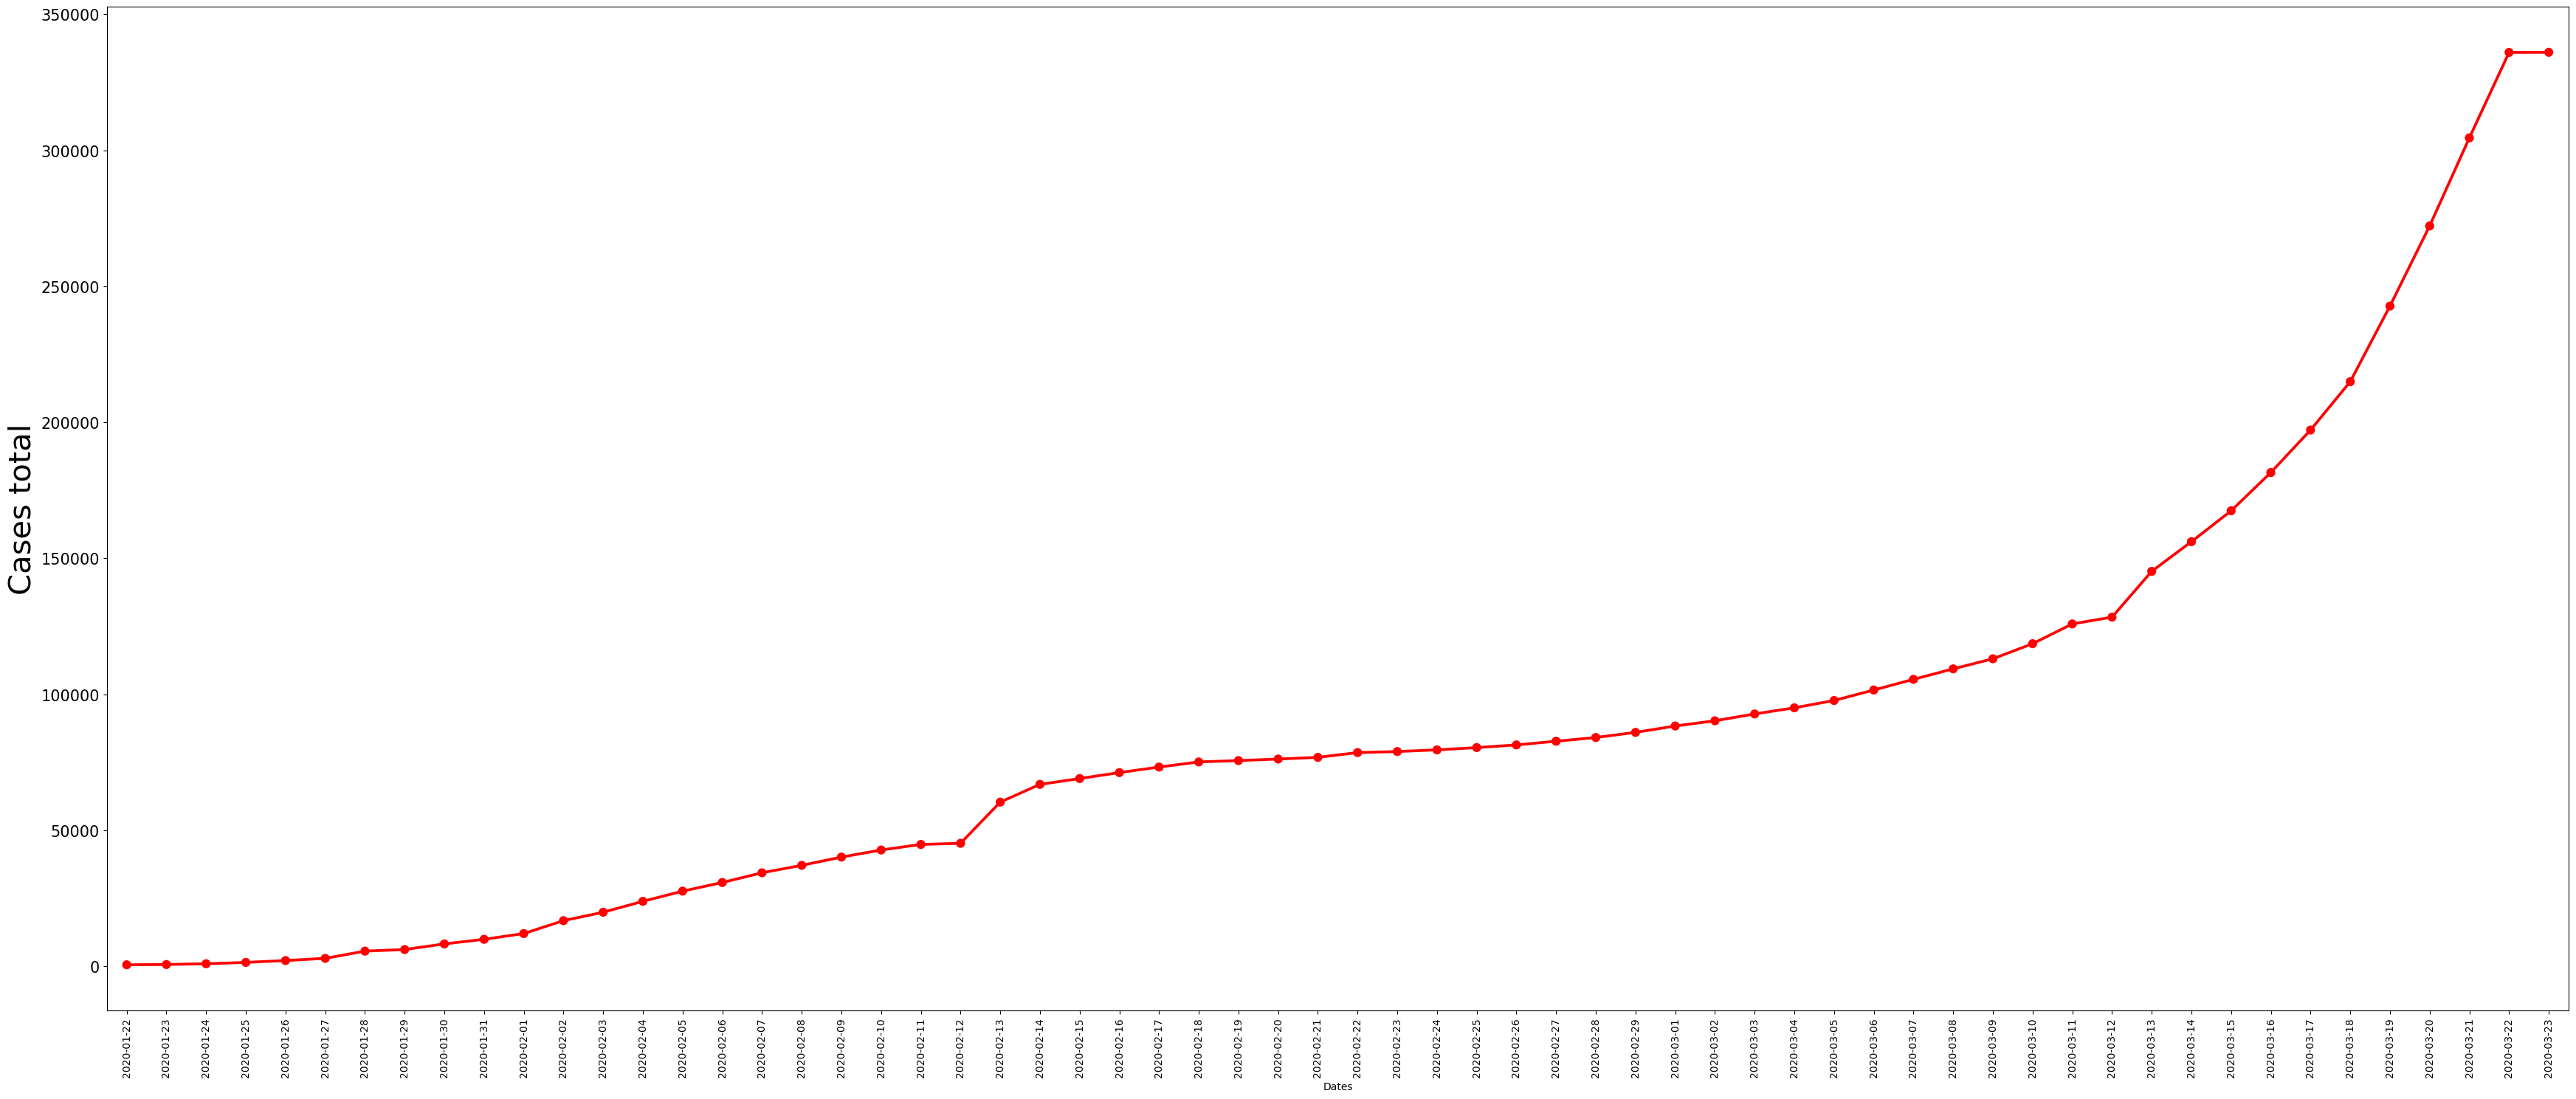

In [8]:
#plot for confirmed cases
plt.figure(figsize=(35,15))

#t_cases=data.groupby('date')['date','confirmed'].sum().reset_index()
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)
plt.tight_layout()
plt.show()

In [9]:
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

country   active
0            Italy  46638.0
1               US  32681.0
2          Germany  24513.0
3            Spain  24421.0
4           France  13170.0
5             Iran  12022.0
6      Switzerland   7016.0
7      South Korea   5884.0
8   United Kingdom   5392.0
9            China   5351.0
10     Netherlands   4034.0
11         Austria   3219.0
12         Belgium   3063.0
13          Norway   2375.0
14          Sweden   1897.0
15        Portugal   1581.0
16          Brazil   1566.0
17         Denmark   1500.0
18          Canada   1439.0
19       Australia   1219.0

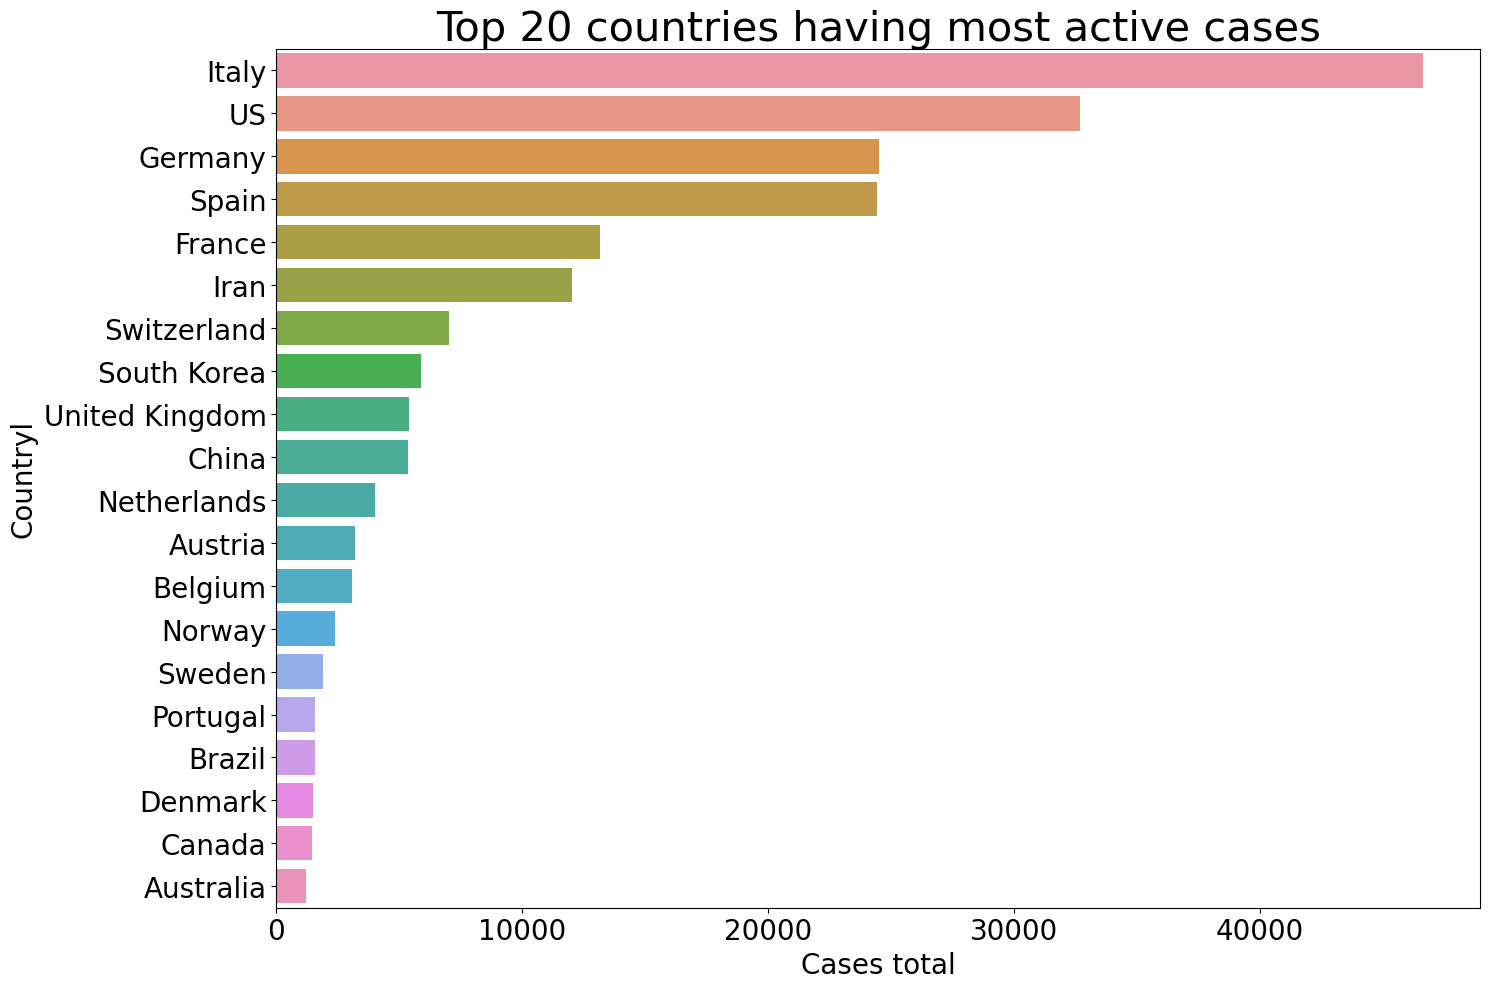

In [10]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
#for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)
plt.tight_layout()
plt.show()

In [11]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

country  deaths
0            Italy  5476.0
1            China  3274.0
2            Spain  1772.0
3             Iran  1685.0
4           France   674.0
5               US   417.0
6   United Kingdom   282.0
7      Netherlands   180.0
8      South Korea   104.0
9      Switzerland    98.0
10         Germany    94.0
11         Belgium    75.0
12       Indonesia    48.0
13           Japan    40.0
14          Turkey    30.0
15     Philippines    25.0
16          Brazil    25.0
17          Canada    21.0
18          Sweden    21.0
19      San Marino    20.0

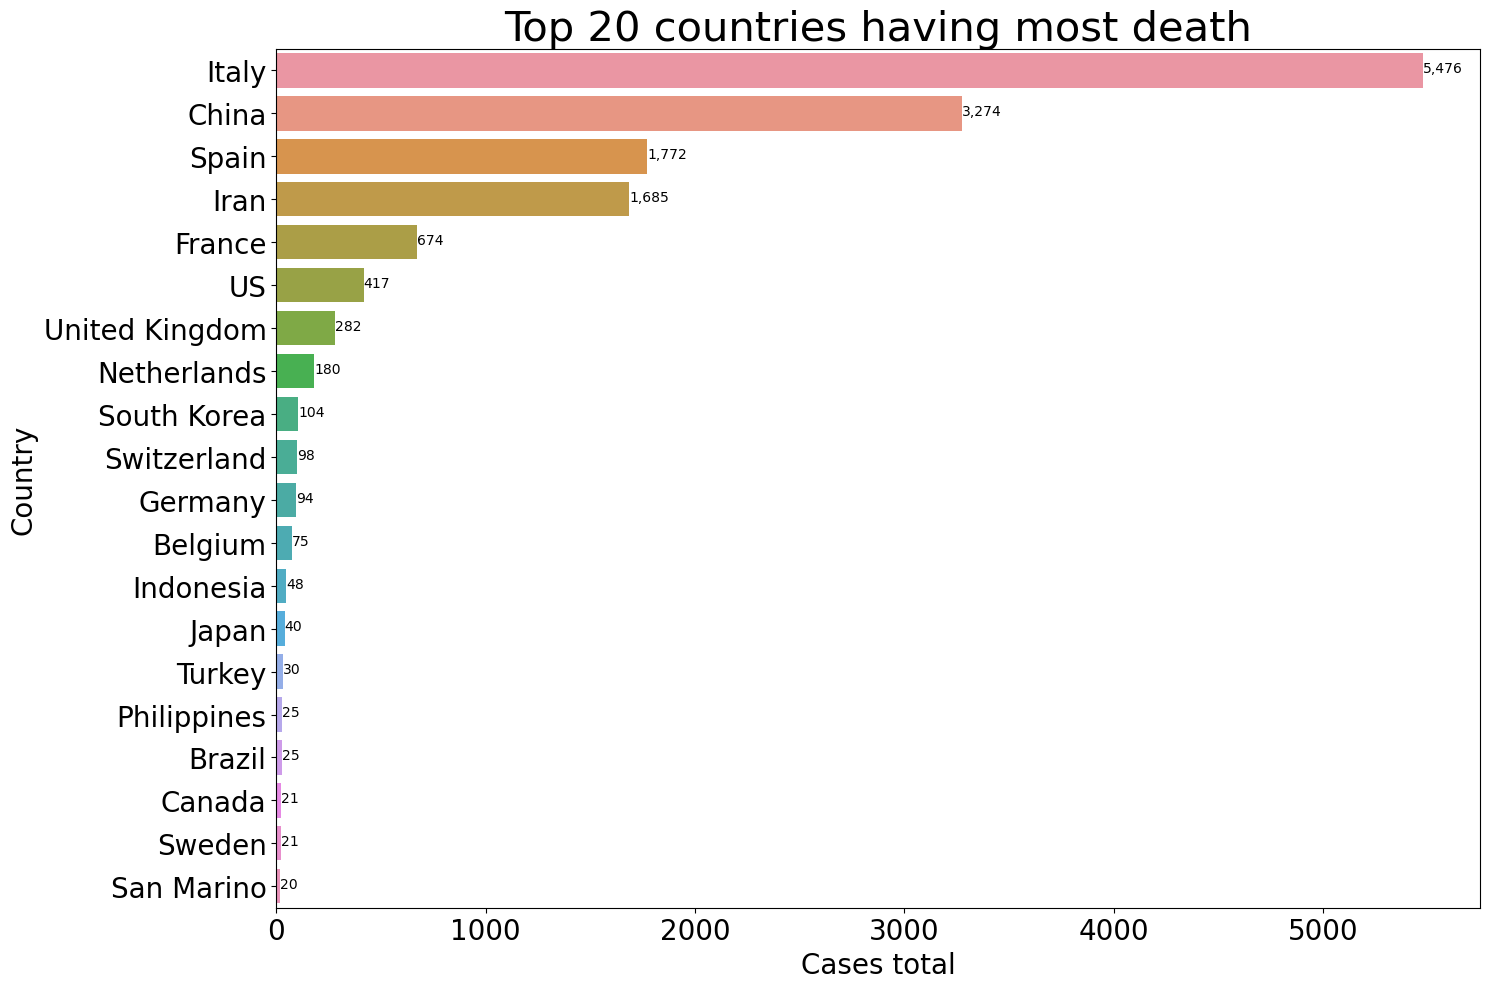

In [12]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.tight_layout()
plt.show()

In [13]:
recover=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
recover


country  recovered
0            China    72814.0
1             Iran     7931.0
2            Italy     7024.0
3      South Korea     2909.0
4            Spain     2575.0
5           France     2200.0
6      Cruise Ship      325.0
7          Germany      266.0
8          Belgium      263.0
9            Japan      235.0
10              US      178.0
11         Bahrain      149.0
12       Singapore      144.0
13        Malaysia      139.0
14     Switzerland      131.0
15       Australia       88.0
16  United Kingdom       67.0
17         Algeria       65.0
18         Romania       64.0
19            Iraq       57.0

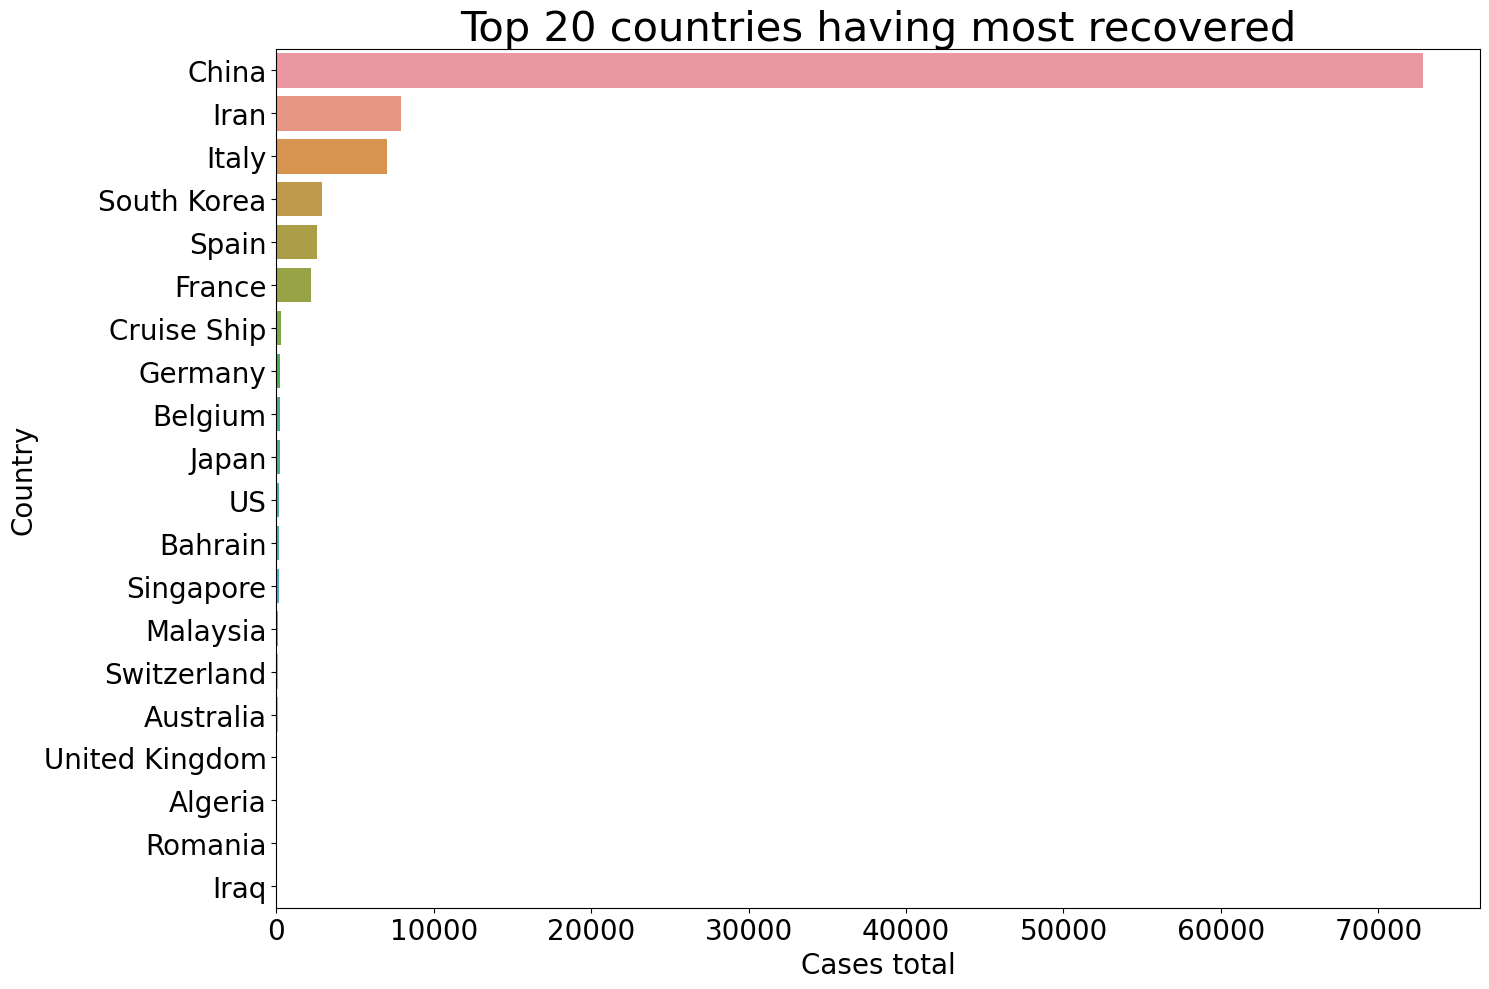

In [14]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
#for i,(value,name) in enumerate(zip(recover.recovered,recover.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.tight_layout()
plt.show()

In [15]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Brazil.head()

date  recovered  deaths  confirmed  active
0 2020-01-22        0.0     0.0        0.0     0.0
1 2020-01-23        0.0     0.0        0.0     0.0
2 2020-01-24        0.0     0.0        0.0     0.0
3 2020-01-25        0.0     0.0        0.0     0.0
4 2020-01-26        0.0     0.0        0.0     0.0

In [16]:
# Data of China
china = data[data.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

date  recovered  deaths  confirmed  active
0 2020-01-22       28.0    17.0      548.0   503.0
1 2020-01-23       30.0    18.0      643.0   595.0
2 2020-01-24       36.0    26.0      920.0   858.0
3 2020-01-25       39.0    42.0     1406.0  1325.0
4 2020-01-26       49.0    56.0     2075.0  1970.0

In [17]:
# Data of USA
us = data[data.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

date  recovered  deaths  confirmed  active
0 2020-02-24        0.0     0.0       36.0    36.0
1 2020-02-25        0.0     0.0       36.0    36.0
2 2020-02-26        0.0     0.0       42.0    42.0
3 2020-02-27        0.0     0.0       42.0    42.0
4 2020-02-28        0.0     0.0       44.0    44.0

In [18]:
# Data of Italy
italy = data[data.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

date  recovered  deaths  confirmed  active
0 2020-01-31        0.0     0.0        2.0     2.0
1 2020-02-01        0.0     0.0        2.0     2.0
2 2020-02-02        0.0     0.0        2.0     2.0
3 2020-02-03        0.0     0.0        2.0     2.0
4 2020-02-04        0.0     0.0        2.0     2.0

In [19]:
Russia=data[data.country=='US']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia.head()

date  recovered  deaths  confirmed  active
0 2020-02-01        0.0     0.0        0.0     0.0
1 2020-02-02        0.0     0.0        0.0     0.0
2 2020-02-03        0.0     0.0        0.0     0.0
3 2020-02-04        0.0     0.0        0.0     0.0
4 2020-02-05        0.0     0.0        0.0     0.0

In [20]:
India=data[data.country=='US']
India=India.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
India=India.iloc[9:].reset_index().drop('index',axis=1)
India.head()

date  recovered  deaths  confirmed  active
0 2020-01-31        0.0     0.0        0.0     0.0
1 2020-02-01        0.0     0.0        0.0     0.0
2 2020-02-02        0.0     0.0        0.0     0.0
3 2020-02-03        0.0     0.0        0.0     0.0
4 2020-02-04        0.0     0.0        0.0     0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


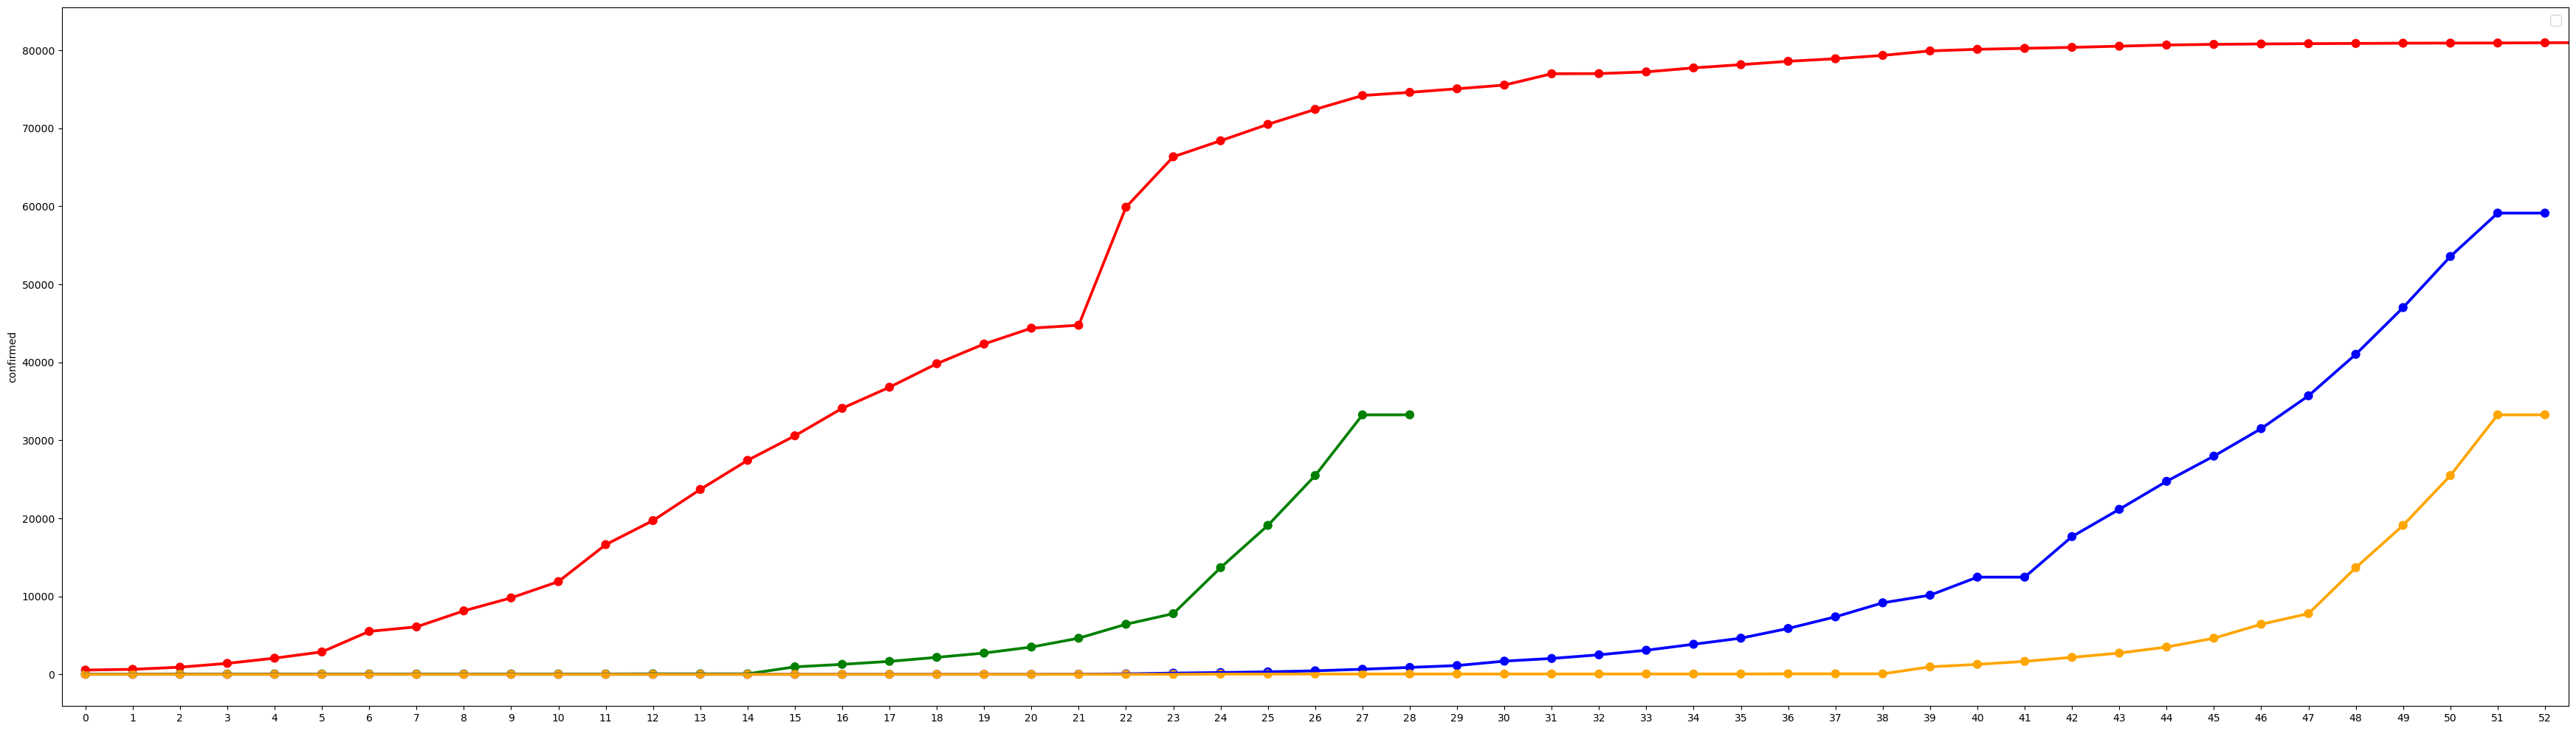

In [21]:
plt.figure(figsize=(35, 10))

sns.pointplot(x=china.index, y=china.confirmed, color='red', label="China")
sns.pointplot(x=us.index, y=us.confirmed, color='green', label=" USA")
sns.pointplot(x=italy.index, y=italy.confirmed, color='blue', label="Italy")
sns.pointplot(x=India.index, y=India.confirmed, color='orange', label="India")
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

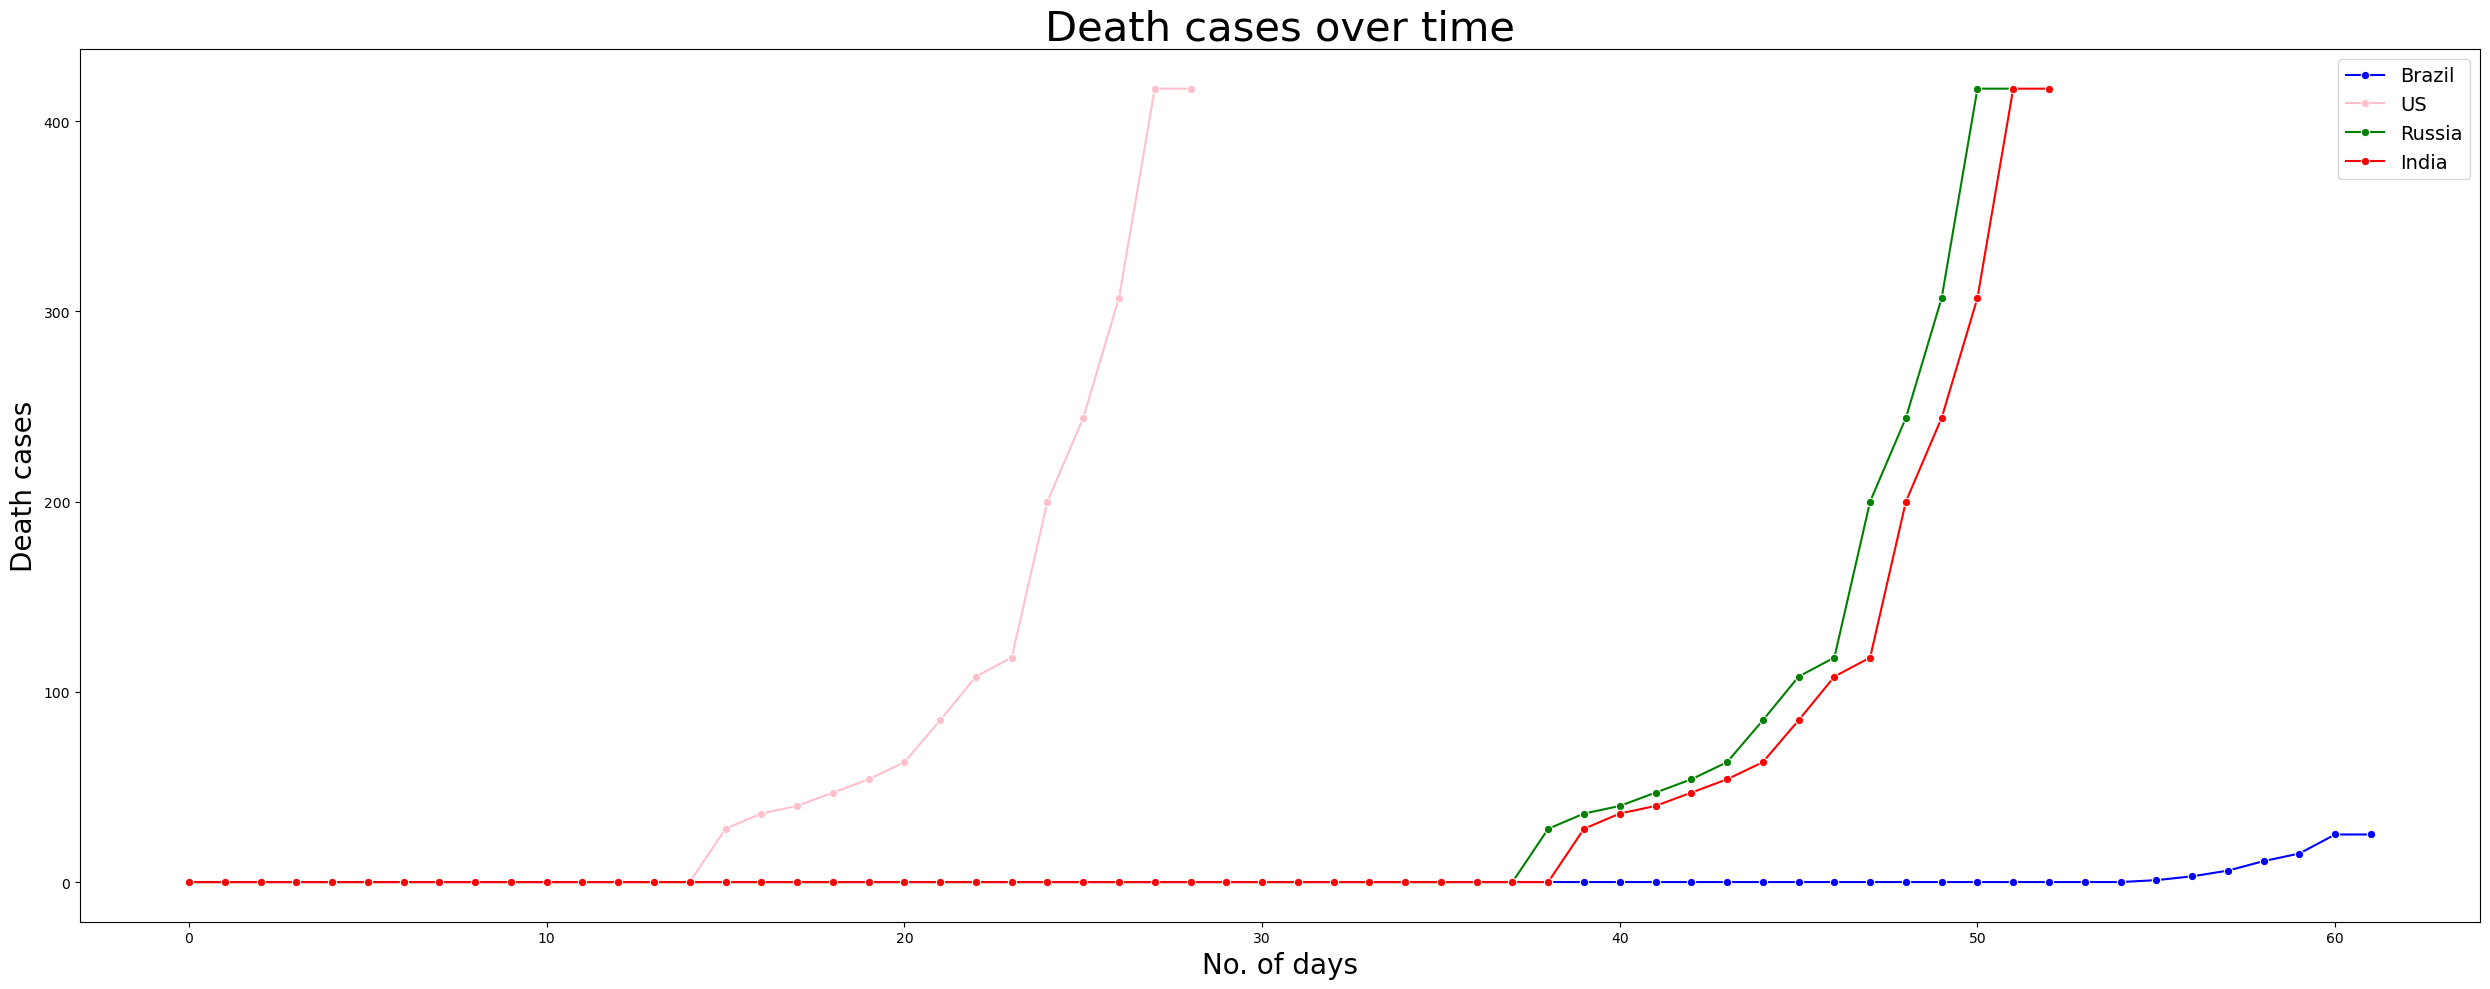

In [22]:
plt.figure(figsize=(25, 10))

# Line plot for Brazil with blue color
sns.lineplot(x=Brazil.index, y=Brazil.deaths, color='blue', label='Brazil', marker='o')

# Line plot for US with pink color
sns.lineplot(x=us.index, y=us.deaths, color='pink', label='US', marker='o')

# Line plot for Russia with green color
sns.lineplot(x=Russia.index, y=Russia.deaths, color='green', label='Russia', marker='o')

# Line plot for India with red color
sns.lineplot(x=India.index, y=India.deaths, color='red', label='India', marker='o')

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
plt.tight_layout()
plt.legend(fontsize=14)  # Add legend to differentiate the series
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


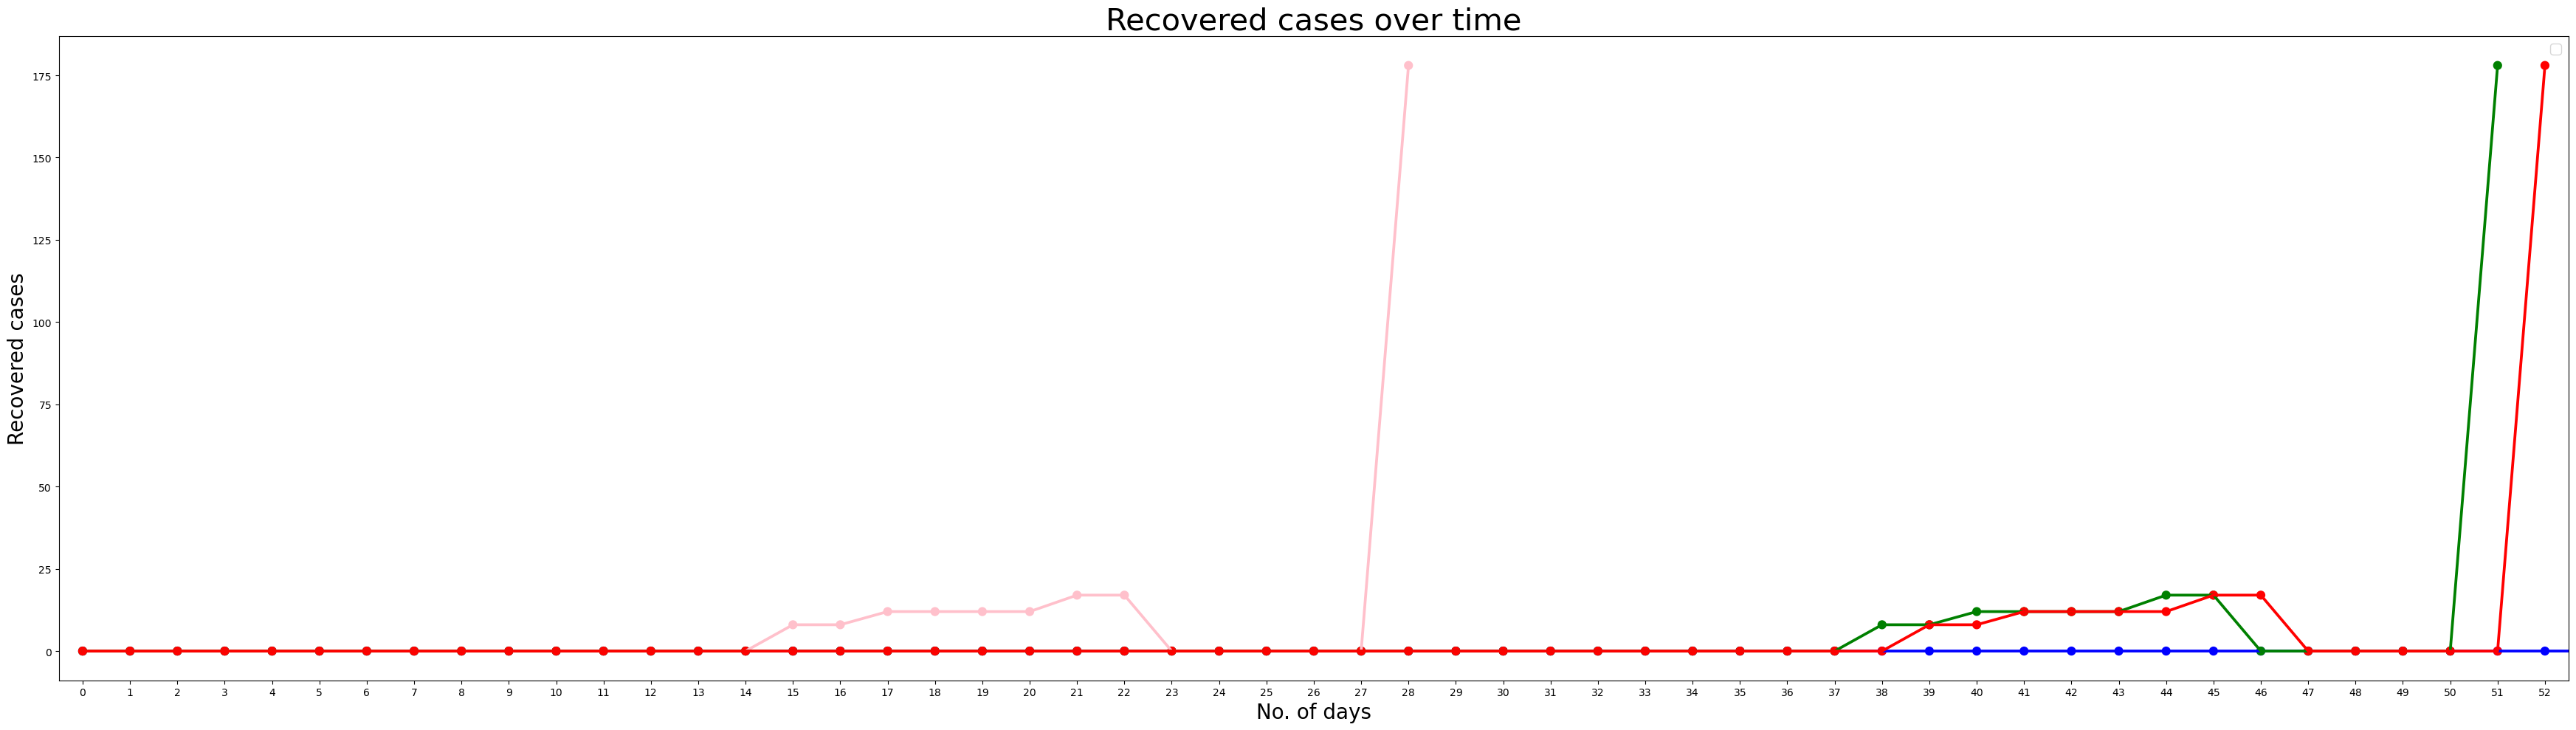

In [23]:
plt.figure(figsize=(35, 10))

# Point plot for Brazil with blue color
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color='blue', label='Brazil')

# Point plot for US with pink color
sns.pointplot(x=us.index, y=us.recovered, color='pink', label='US')

# Point plot for Russia with green color
sns.pointplot(x=Russia.index, y=Russia.recovered, color='green', label='Russia')

# Point plot for India with red color
sns.pointplot(x=India.index, y=India.recovered, color='red', label='India')

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
from prophet import Prophet

In [25]:
data.groupby('date').sum().head()

lat       long  confirmed  deaths  recovered  active
date                                                                  
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0   509.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0   604.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0   877.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0  1351.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0  2005.0

In [26]:
total_active=data['active'].sum()
print('Total no.of active COVID 19 CASES',total_active)

Total no.of active COVID 19 CASES 3352375.0


In [27]:
data['Active']=data['confirmed']-data['deaths']+data['recovered']

In [28]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

date  confirmed
57 2020-03-19   242708.0
58 2020-03-20   272166.0
59 2020-03-21   304524.0
60 2020-03-22   335955.0
61 2020-03-23   336004.0

In [29]:
confirmed.tail()

date  confirmed
57 2020-03-19   242708.0
58 2020-03-20   272166.0
59 2020-03-21   304524.0
60 2020-03-22   335955.0
61 2020-03-23   336004.0

In [30]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

ds         y
57 2020-03-19  242708.0
58 2020-03-20  272166.0
59 2020-03-21  304524.0
60 2020-03-22  335955.0
61 2020-03-23  336004.0

In [31]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:32:59 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future=m.make_future_dataframe(periods=7,freq='D')
future.tail()

ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355136.949546  335591.202671  375417.289945
65 2020-03-27  372235.404213  351917.606678  391550.427774
66 2020-03-28  388675.043714  369194.053352  408522.280872
67 2020-03-29  405308.040537  385237.618819  427307.619657
68 2020-03-30  418529.738208  396099.427907  441507.862464

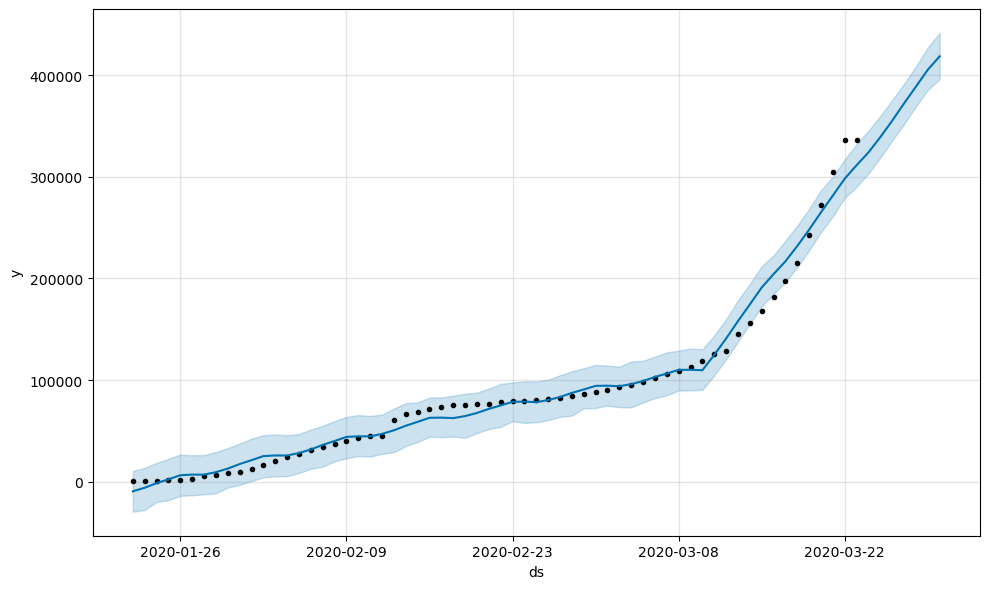

In [34]:
confirmed_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

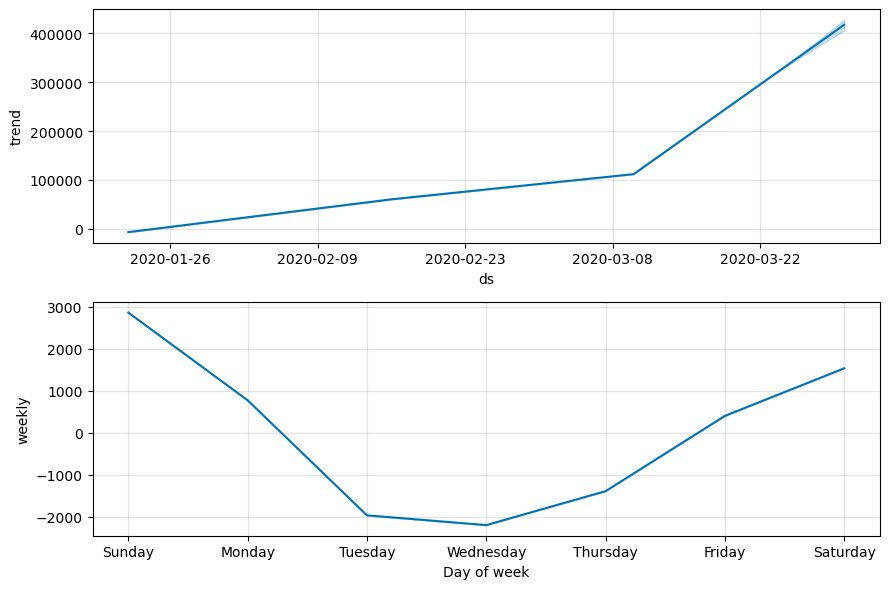

In [35]:
confirmed_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [36]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [37]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

14:33:01 - cmdstanpy - INFO - Chain [1] start processing
14:33:01 - cmdstanpy - INFO - Chain [1] done processing


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2020-03-26  15411.895821  14747.515322  16030.470519
65 2020-03-27  16199.637166  15516.077373  16773.124709
66 2020-03-28  17006.925198  16355.878355  17669.409187
67 2020-03-29  17831.527103  17137.263227  18506.056689
68 2020-03-30  18491.009178  17848.815261  19170.639258

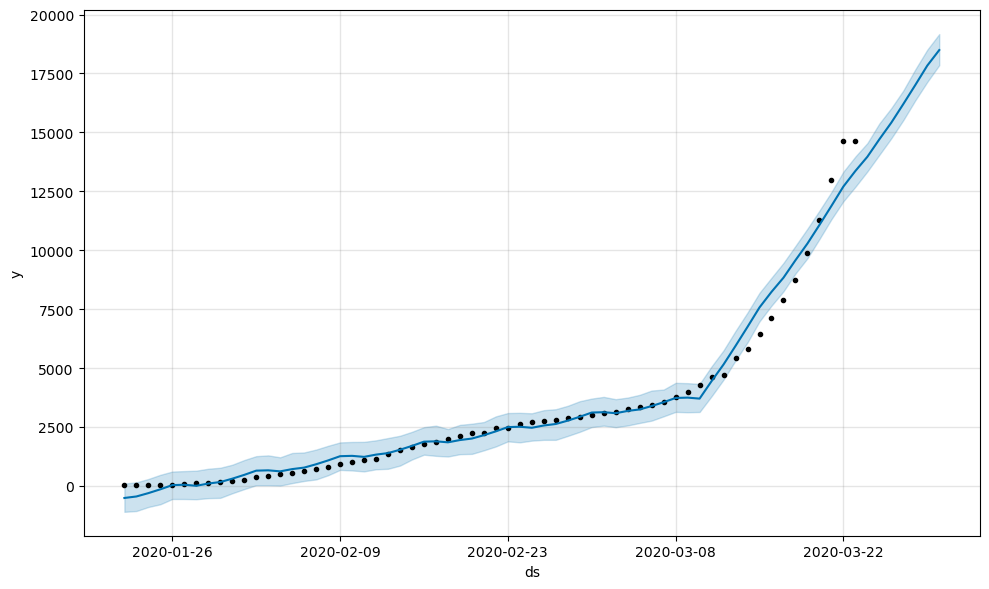

In [39]:
deaths_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

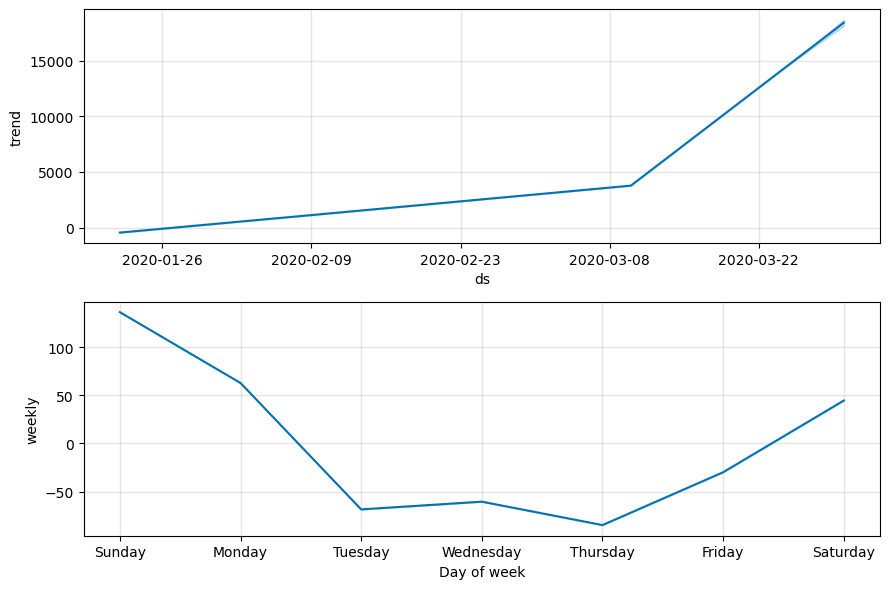

In [40]:
deaths_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [41]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [42]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21,freq='D')
future.tail()

14:33:02 - cmdstanpy - INFO - Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing


ds
78 2020-04-09
79 2020-04-10
80 2020-04-11
81 2020-04-12
82 2020-04-13

In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
78 2020-04-09  137544.581080  131850.575954  143711.173973
79 2020-04-10  139914.116902  133535.484244  146409.448515
80 2020-04-11  142861.834478  136173.460305  150234.397282
81 2020-04-12  145754.221730  138445.892107  153707.705122
82 2020-04-13  147914.564733  140193.530352  156276.563151

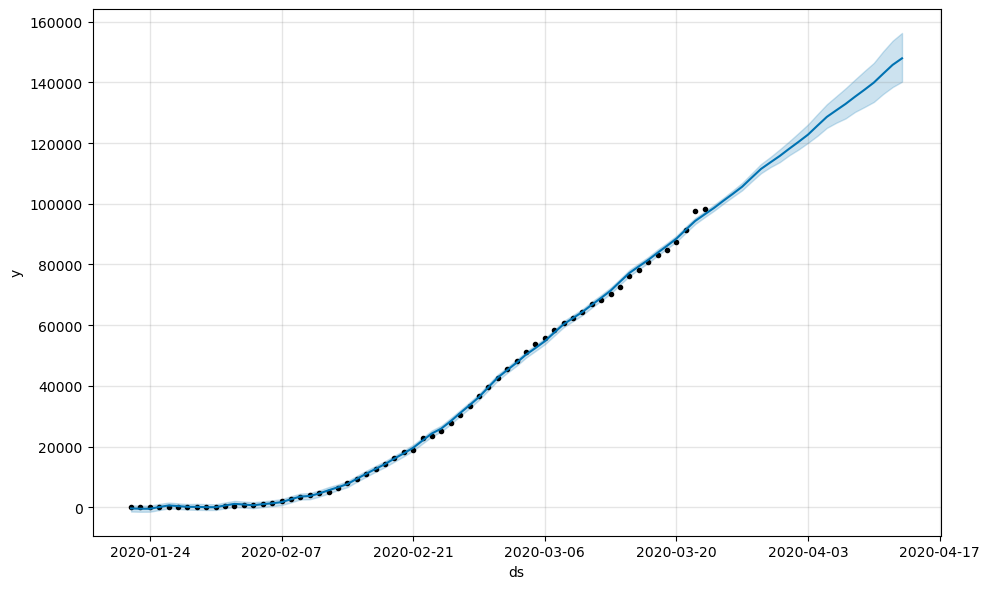

In [44]:
recovered_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

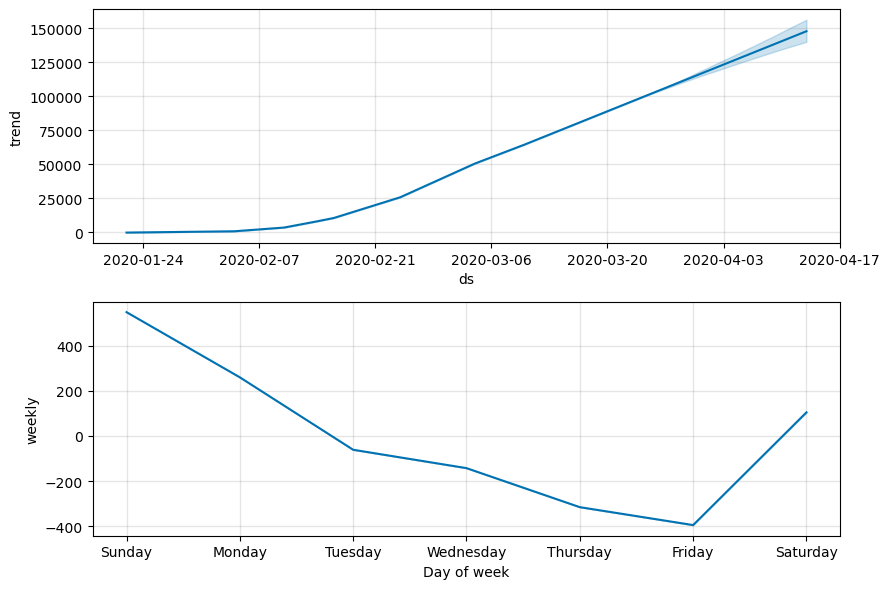

In [45]:
recovered_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [46]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast['yhat']

0       -378
1       -478
2       -484
3         87
4        604
       ...  
78    137544
79    139914
80    142861
81    145754
82    147914
Name: yhat, Length: 83, dtype: int32